# NAIVE BAYES CLASSIFIER PROJECT
By : Shashidhar. B


### Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

### Dataset

The dataset includes data from 768 women with 8 characteristics, in particular:

1. Number of times pregnant

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skin fold thickness (mm)

5. 2-Hour serum insulin (mu U/ml)

6. Body mass index (weight in kg/(height in m)^2)

7. Diabetes pedigree function

8. Age (years)

The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

### Original Source
The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

## Objective
Model the Pima Indians Diabetes sample using Naive Bayes Classifier

## Steps carried to achieve Objective

1.Import Necessary Libraries and Packages.

2.Import Data.

3.Summarise Data.

4.Data Cleaning and Transformation

5.Split Data into Train and Test sets(70:30).

6.NB Train Data Set.

7.Accuracy of Test Data.

### 1.Import Necessary Libraries and Packages

In [199]:
#For Numerial Operations numpy(Numerical Python) can be used
import numpy as np

#For Data Analysis pandas(Python Data Analysis Library) can be used
import pandas as pd

#For 2D graphs ploting matplotlib library can be used
import matplotlib.pyplot as plt
#To enable matplotlib to plot in Jupyter Notebook
%matplotlib inline

#For better visualisation of Statistical Data seaborn library can be used
import seaborn as sns



In [200]:
#To Split the Data into Train and Test
from sklearn.model_selection import train_test_split

#To model the Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#To Calculate the Accuracy of the Model 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

### 2.Import Data

In [201]:
#Reading the Data
file=pd.read_csv("pima-indians-diabetes-1.csv")

In [202]:
#Deep Copying file for safety
data=file.copy(deep=True)

### 3.Summarise Data

In [203]:
#To Look-up Data
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [204]:
#Getting complete Statistical overview of data
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From Head and Describe command we can know that;

1)There are totally 8 attributes in the given data-set which are properly indexed and labled.

2) Atrribute class is the target variable coded 1 for Diabetic and 0 for Non-Diabetic. This should be Categorical. 

3) There are 768 rows in all the column.

4) The Mean and the Median Value of the test attribute has larger difference indicating significant Outliers.
This can be confirmed Visually and delt while Cleaning the Data.




### 4.Data Cleaning and Transformation



In [205]:
#Let us change the Header lables of the data as per convenience
data=data.rename(columns={"Preg":"Pregnancies_Number",
"Plas":"Glucose_Level",
"Pres":"BP",
"skin":"Skin_Fold_Thickness",
"test":"Insulin_Intake",
"mass":"BMI",
"pedi":"Diabetes_Pedigree_Function",
"age":"Age",
"class":"Class"})

In [206]:
#To check for null entries and  data type of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies_Number            768 non-null int64
Glucose_Level                 768 non-null int64
BP                            768 non-null int64
Skin_Fold_Thickness           768 non-null int64
Insulin_Intake                768 non-null int64
BMI                           768 non-null float64
Diabetes_Pedigree_Function    768 non-null float64
Age                           768 non-null int64
Class                         768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


There are no null or NaN values in the data set.

But during evaluation of the data from above(and in the excel spread sheet), there are many entries with zero are found.
These should be delt properly for increasing accuracy of the prediction.

There are no string or any other data type apart from Integer and Float in the data. 
Also we can notice that, the atribute Class is Categorical the data-type should be of Contineous to apply Naive Bayes.

Hence their is no need to change the Contineous attribute to Categorical.

In [207]:
#Now let us deal with the entries with zero values;
#1st let us check how many entries are of zero values.
(data==0).sum(axis=0)

Pregnancies_Number            111
Glucose_Level                   5
BP                             35
Skin_Fold_Thickness           227
Insulin_Intake                374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
Class                         500
dtype: int64

From above it can be found that;

Glucose_Level, BP, Skin_Fold_Thickness and BMI values can not be equal to zero.

Glucose_Level, BP and BMI values are equal to zero are less in number which can be droped,
But Skin_Fold_Thickness should be replaced with an alternative value.


#### Data Visualisation
Now before making any Transformation in the Data let us Clean the Data.

Let us Visualise the Data graphically for better understanding of various Features and their Value Distribution.


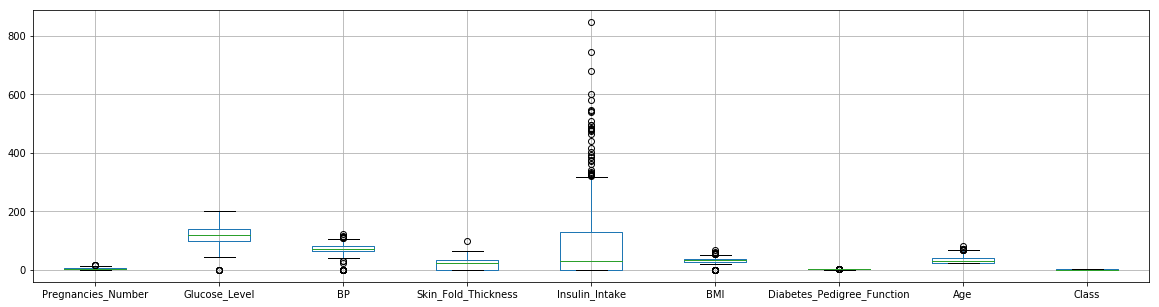

In [208]:
data.boxplot(figsize=(20,5))

The Atributes Pregnancies_Number, Age and Class are just number without any Statistical importance.

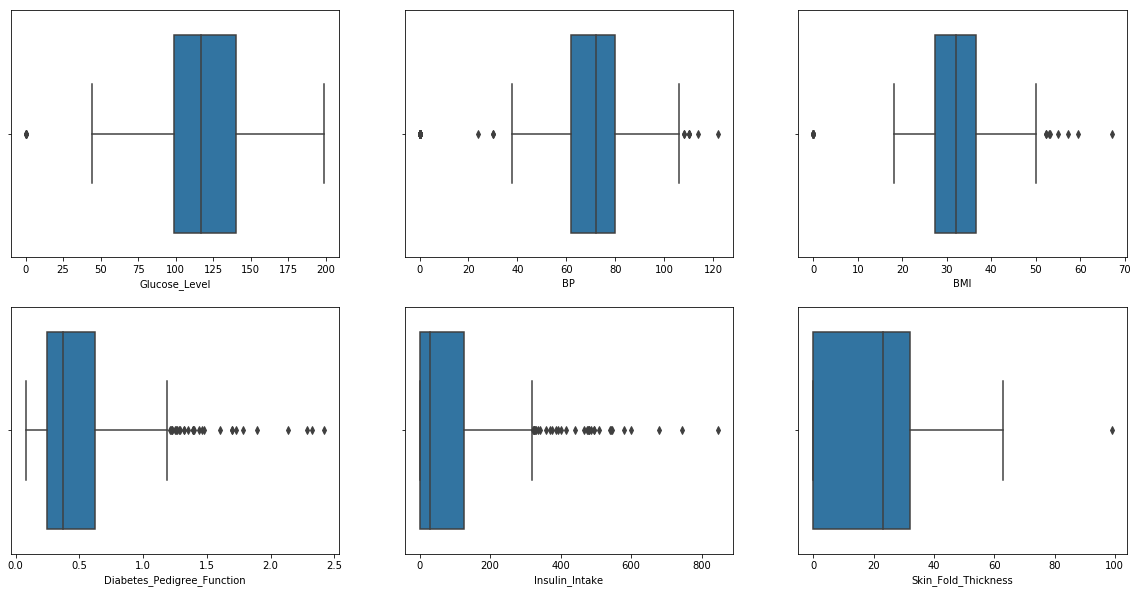

In [209]:
f,axes=plt.subplots(2,3,figsize=(20,10))
sns.boxplot(data['Glucose_Level'],ax=axes[0,0])
sns.boxplot(data['BP'],ax=axes[0,1])
sns.boxplot(data['BMI'],ax=axes[0,2])
sns.boxplot(data['Diabetes_Pedigree_Function'],ax=axes[1,0])
sns.boxplot(data['Insulin_Intake'],ax=axes[1,1])
sns.boxplot(data['Skin_Fold_Thickness'],ax=axes[1,2])
plt.show()


In [210]:
#Let us drop all the Extreme Outliers firstly
data1 = data[data['Glucose_Level']>=25]
data1 = data1[data1['BP']>=30] + data1[data1['BP']<=110]
data1 = data1[data1['BMI']>=10] + data1[data1['BMI']<=60]
data1 = data1[data1['Diabetes_Pedigree_Function']<=2]
data1 = data1[data1['Insulin_Intake']<=550]
data1 = data1[data1['Skin_Fold_Thickness']<=80]
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies_Number,116.0,14.655172,11.771080,0.000,4.000,12.000,24.000,52.000
Glucose_Level,116.0,452.965517,100.283592,272.000,388.000,438.000,503.000,776.000
BP,116.0,281.103448,48.623734,152.000,248.000,284.000,312.000,384.000
Skin_Fold_Thickness,116.0,29.034483,32.862806,0.000,0.000,0.000,65.000,80.000
Insulin_Intake,116.0,92.413793,151.296660,0.000,0.000,0.000,197.000,500.000
BMI,116.0,99.462069,12.291430,72.800,90.000,100.200,109.600,119.600
Diabetes_Pedigree_Function,116.0,1.062897,0.409805,0.312,0.751,1.016,1.274,1.988
Age,116.0,131.103448,53.924485,84.000,88.000,108.000,151.000,276.000
Class,116.0,0.517241,1.347995,0.000,0.000,0.000,0.000,4.000


In [211]:
#Now to find out the entries with zero
(data1==0).sum(axis=0)

Pregnancies_Number             11
Glucose_Level                   0
BP                              0
Skin_Fold_Thickness            63
Insulin_Intake                 80
BMI                             0
Diabetes_Pedigree_Function      0
Age                             0
Class                         101
dtype: int64

In [212]:
#Skin_Fold_Thickness can not be zero.

#let us drop all the rows of Skin_Fold_Thickness with zero value.
data1 = data1.drop(data1[data1['Skin_Fold_Thickness'] == 0 ].index)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies_Number,53.0,10.792453,10.715479,0.00,4.000,8.000,12.00,52.000
Glucose_Level,53.0,411.773585,78.216328,272.00,360.000,396.000,452.00,676.000
BP,53.0,271.622642,50.476280,152.00,232.000,280.000,304.00,368.000
Skin_Fold_Thickness,53.0,63.547170,12.370197,40.00,52.000,68.000,76.00,80.000
Insulin_Intake,53.0,202.264151,167.264893,0.00,0.000,212.000,336.00,500.000
BMI,53.0,96.890566,13.101648,72.80,87.200,97.600,107.60,119.600
Diabetes_Pedigree_Function,53.0,1.166717,0.443557,0.34,0.916,1.076,1.52,1.988
Age,53.0,108.377358,34.286253,84.00,88.000,96.000,116.00,248.000
Class,53.0,0.301887,1.066715,0.00,0.000,0.000,0.00,4.000


In [213]:
(data==0).sum(axis=0)

Pregnancies_Number            111
Glucose_Level                   5
BP                             35
Skin_Fold_Thickness           227
Insulin_Intake                374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
Class                         500
dtype: int64

he idea here is to replace all the zero and outlier rows with the median of best of the data entries we have.

This can be achieved by replacing the respective median values of data_norm1 to data_norm.
By this we have found the true median undisturbed by the outliers and zero entries.

By doing so we will be retaining large amount of available data for train and test.

In [214]:
#To Calculate the Median Value of Glucose_Level
median_Glucose_Level= data1['Glucose_Level'].median()

#To Replace the Median Value where values are 0
data['Glucose_Level'] = data['Glucose_Level'].replace(to_replace=0, value=median_Glucose_Level)


median_BP= data1['BP'].median()
data['BP'] = data['BP'].replace(to_replace=0, value=median_BP)

median_BMI= data1['BMI'].median()
data['BMI']= data['BMI'].replace(to_replace=0, value=median_BMI)

median_Skin_Fold_Thickness= data1['Skin_Fold_Thickness'].median()
data['Skin_Fold_Thickness']= data['Skin_Fold_Thickness'].replace(to_replace=0, value=median_Skin_Fold_Thickness)

In [215]:
#Now to replace the outliers values with the respective medians.
data.loc[data['Glucose_Level']<=25,'Glucose_Level'] = data1['Glucose_Level'].median()
data.loc[data['BP']<=30,'BP'] = data1['BP'].median()
data.loc[data['BP']>=110,'BP'] = data1['BP'].median()
data.loc[data['BMI']>=60,'BMI'] = data1['BMI'].median()
data.loc[data['BMI']<=10,'BMI'] = data1['BMI'].median()
data.loc[data['Diabetes_Pedigree_Function']>=2,'Diabetes_Pedigree_Function'] = data1['Diabetes_Pedigree_Function'].median()
data.loc[data['Insulin_Intake']>=550,'Insulin_Intake'] = data1['Insulin_Intake'].median()
data.loc[data['Skin_Fold_Thickness']>=80,'Skin_Fold_Thickness'] = data1['Skin_Fold_Thickness'].median()

It can be noted that the attributes (mainly; Glucose_Level, BP, Skin_Fold_Thickness and BMI) zero values and Outliers have been replaced with respective median values.

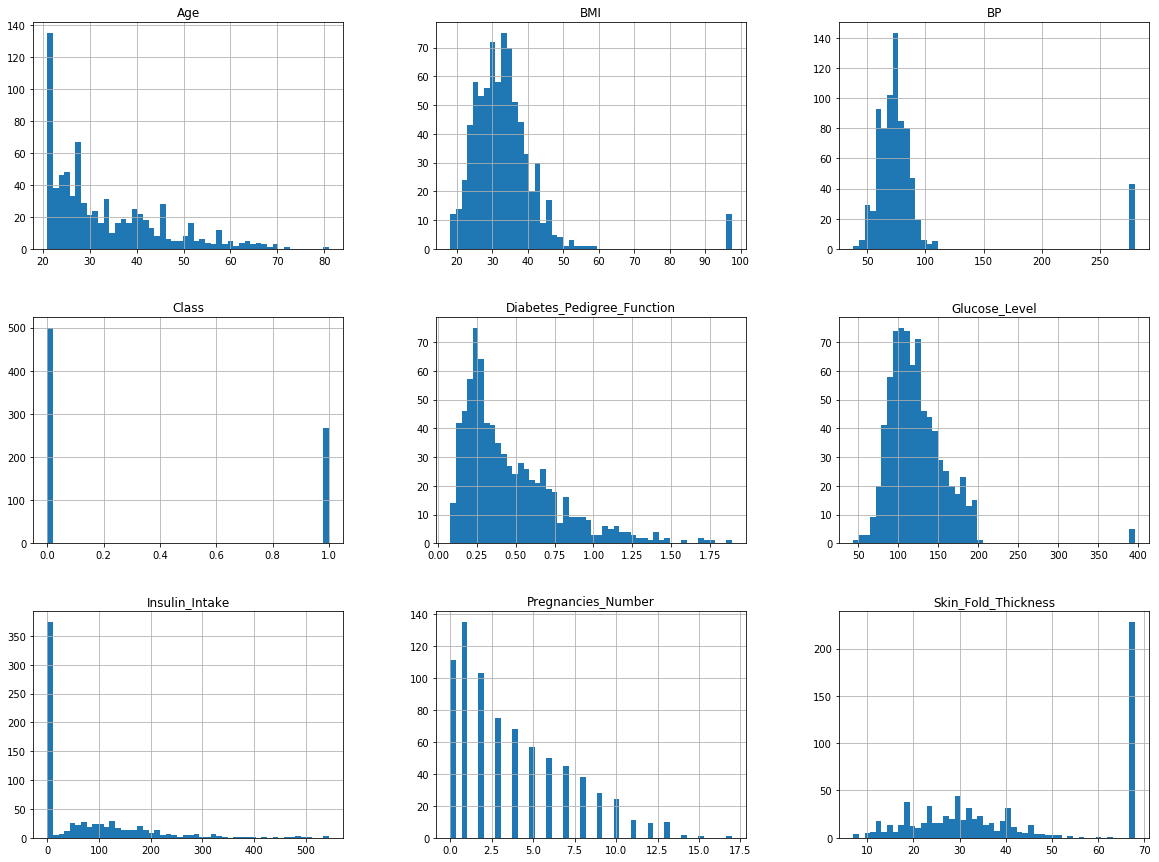

In [216]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

### 5.Split Data into Train and Test sets(70:30)


In [218]:
# Arrange data into independent variables and dependent variables
X = data.values[:,1:5]  ## Features
Y = data.values[:,8]  ## Target

In [219]:
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

### 6.NB Train Data Set


In [220]:
#Since the data is Normally Distributed we shall use GaussianNB.
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
GaussianNB(priors=None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [221]:
#Y_pred = clf.predict(X_test)
Y_pred = classifier.predict(X_test)

### 7.Accuracy of Test Data

In [222]:
accuracy_score(Y_test, Y_pred, normalize = True)

0.7012987012987013

### Conclusion

We finally find a score of 70% using NAIVE BAYES CLASSIFIER.